In [1]:
def nn():
    import zipfile
    import pandas as pd
    from sklearn.neighbors import NearestNeighbors
    from sklearn.feature_extraction.text import TfidfVectorizer
    import glob, os
    
    with zipfile.ZipFile("snowden.zip","r") as zip_ref:
         zip_ref.extractall("snowden")
    
    os.chdir("C:\\Users\\Miya\\OneDrive\\Miya'sGithub\\Big-Data-Course-Projects\snowden")
    file_list = [file for file in glob.glob("*.txt")]
    len(file_list)
    
    
    content_list = []
    
    for file in file_list:
        with open(file, encoding="utf8") as content_file:
            content_list.append(content_file.read())
        
    content_df = pd.DataFrame.from_dict({'content':content_list})
    
    content = content_df.content
    
    
    tfidf_vectorizer = TfidfVectorizer(
    min_df= 2,
    max_df = 85,# min count for relevant vocabulary
    # by their corresponding  ASCII char
    analyzer='word',  # features made of words
    token_pattern=u'[a-z]+',  # tokenize only words of 4+ chars
    ngram_range=(1, 2),  # features made of a single tokens
    use_idf=True,  # enable inverse-document-frequency reweighting
    smooth_idf=True,  # prevents zero division for unseen words
    sublinear_tf=False)
    
    desc_vect = tfidf_vectorizer.fit_transform(content)
    
    
    coo = desc_vect.tocoo(copy = False)
    df_word_matrix = pd.DataFrame({'index': coo.row, 'feature': coo.col, 'data': coo.data}
                 )[['index', 'feature', 'data']].sort_values(['index', 'feature']).reset_index(drop=True)
    word_matrix = df_word_matrix.pivot('index', 'feature', 'data')
    word_matrix = word_matrix.fillna(0)
    
    
    nbrs = NearestNeighbors(n_neighbors=10, algorithm='brute').fit(word_matrix)
    
    distances, indices = nbrs.kneighbors(word_matrix)
    
    
    print(indices)
    
    return indices
    return distances

In [2]:
import time
start_time = time.time()
nn =  nn()
print("--- %s seconds ---" % (time.time() - start_time))

[[ 458  457    0 ...,  453  455 1003]
 [ 458  457    0 ...,  453  455 1003]
 [ 458  457    0 ...,  453  455 1003]
 ..., 
 [1184 1187 1179 ..., 1186 1191 1190]
 [1184 1187 1179 ..., 1181 1190 1191]
 [1184 1187 1179 ..., 1181 1190 1191]]
--- 9.60996127128601 seconds ---


In [4]:
dict_nn = {}
for key, neighbours in zip(list(range(1456)),nn):
    dict_nn[key] = neighbours

In [5]:
import pandas as pd
dict_nn_df = {}
for i in range(10):
    column_i = list(map(lambda x: x[i],dict_nn.values()))
    dict_nn_df[i] = column_i

In [6]:
neighbours_df = pd.DataFrame.from_dict(dict_nn_df)

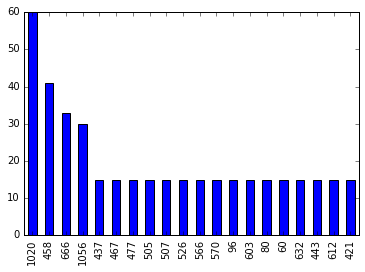

In [30]:
%matplotlib inline
neighbours_df[neighbours_df.columns[0]].value_counts()[:20].plot(kind = 'bar')